In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [4]:
df.price_per_sqft.describe()

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Histogram plot to see how is the data distribution

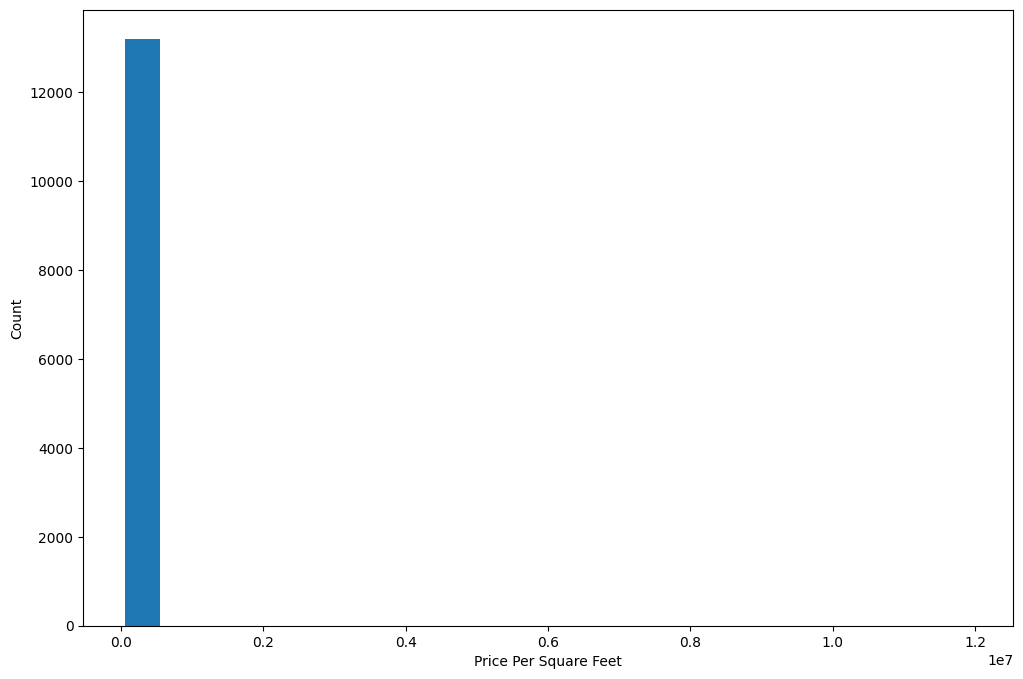

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale to make visualization little better

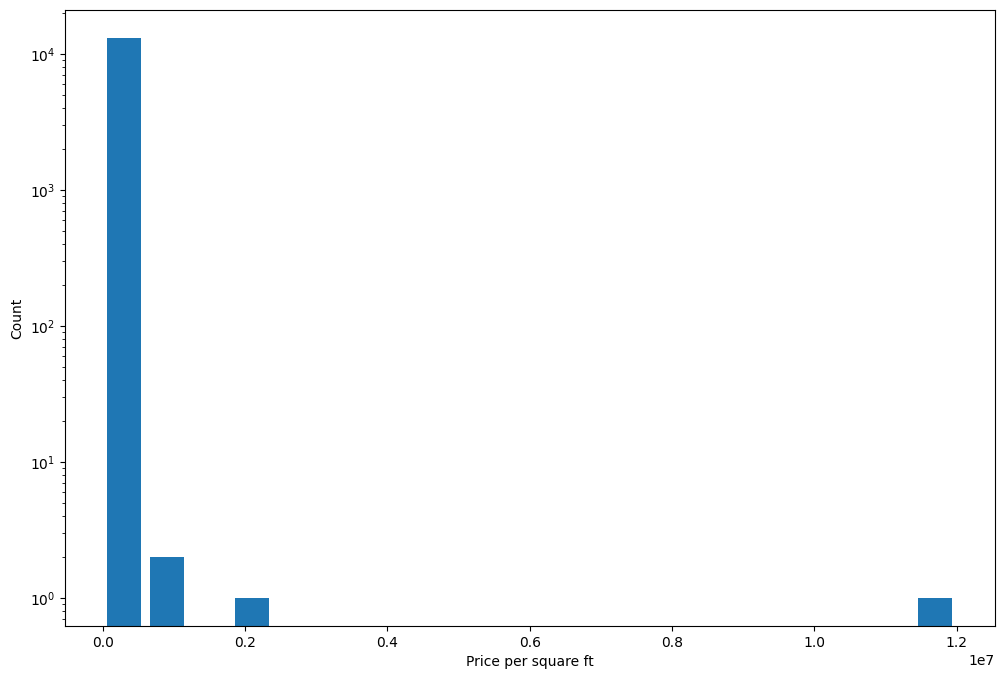

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Now we can see atleast few bars on right hand side of our highest building at least

Treating outliers using percentile first

In [7]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7012,other,1 BHK,650.0,1.0,500.0,1,76923
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111


In [9]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

Removed total 28 outliers

Removing outliers using 4 standard deviation

In [11]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589429), np.float64(-9900.429065502549))

In [12]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995
10000,other,6 Bedroom,1200.0,5.0,280.0,6,23333
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166
5747,other,5 Bedroom,1200.0,5.0,300.0,5,25000
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
1659,Whitefield,5 Bedroom,3250.0,5.0,900.0,5,27692
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
12799,other,5 Bedroom,1650.0,5.0,450.0,5,27272


In [13]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [14]:
df2.shape[0]-df3.shape[0]

125

Removed 125 outliers

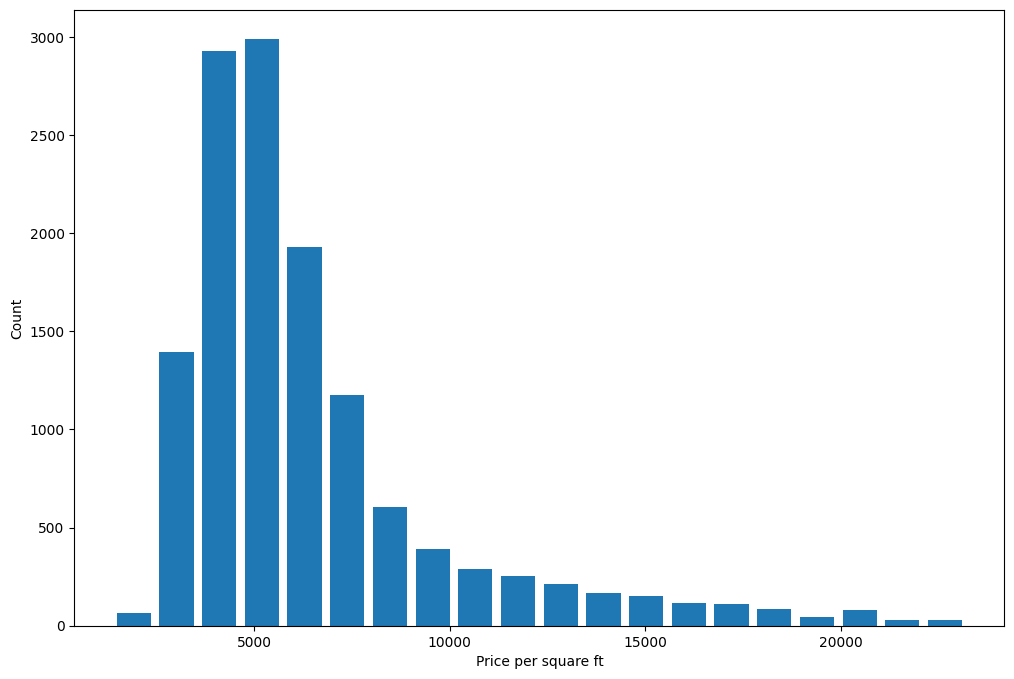

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

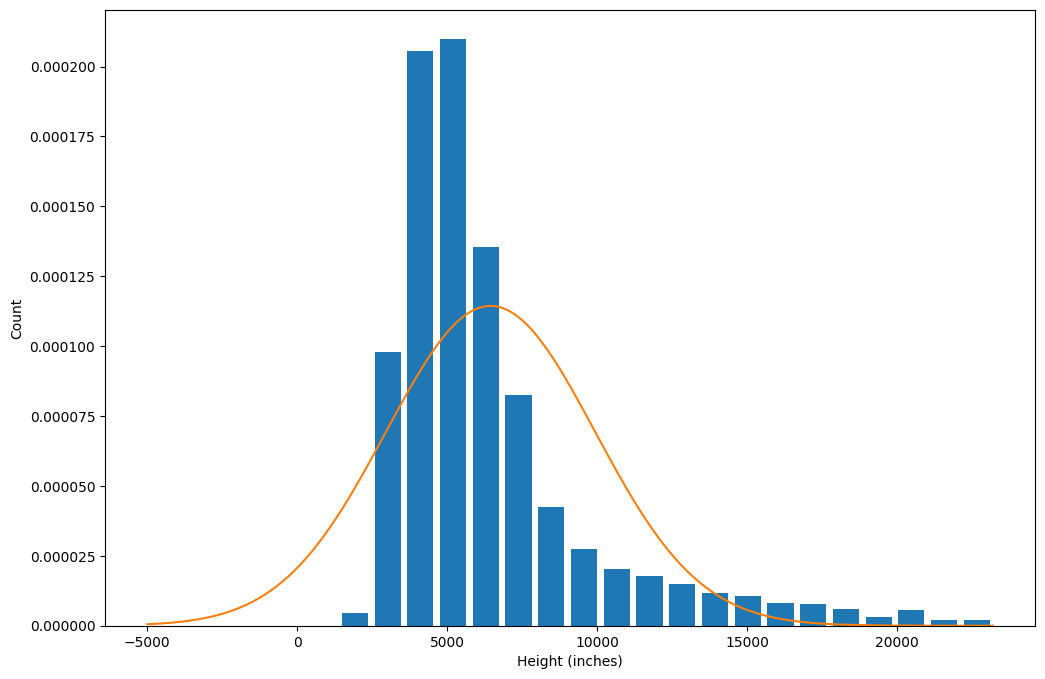

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

Removing outliers using z score, using z score of 4 as thresold

In [17]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-17-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10899,Hennur Road,4 Bedroom,1880.0,4.0,154.00,4,8191,0.368833
6348,other,3 BHK,2108.0,3.0,85.00,3,4032,-0.635508
12340,R.T. Nagar,4 BHK,1800.0,3.0,120.00,4,6666,0.000567
9873,other,3 Bedroom,2400.0,6.0,775.00,3,32291,6.188654
10996,Electronic City Phase II,2 BHK,1160.0,2.0,33.50,2,2887,-0.912010
7096,Hennur Road,3 BHK,2365.0,4.0,175.00,3,7399,0.177576
8106,other,4 Bedroom,1830.0,4.0,325.00,4,17759,2.679375
4024,other,4 Bedroom,2360.0,4.0,150.00,4,6355,-0.074536
794,Padmanabhanagar,2 BHK,1176.0,2.0,62.00,2,5272,-0.336065
3156,Hoodi,2 BHK,1220.0,2.0,50.89,2,4171,-0.601942


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [19]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
760,other,9 Bedroom,600.00,9.0,190.0,9,31666,6.037725
12900,HAL 2nd Stage,5 Bedroom,2040.00,4.0,500.0,5,24509,4.309408
8861,Cunningham Road,5 Bedroom,2925.00,5.0,936.0,5,32000,6.118382
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.042565
3136,other,4 Bedroom,1200.00,4.0,350.0,4,29166,5.434010


In [20]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [21]:
df2.shape[0] - df4.shape[0]

125

In this step also removed 125 outliers. The result's exactly same as 4 standard deviation